#Week 06

Multiple linear regression & polynomial regression

Sample Dataset

Training Dataset

In [1]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'n_topping': [2,1,0,2,0],
         'price': [7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,price
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


Testing Dataset

In [2]:
pizza = {'diameter': [8,9,11,16,12],
         'n_topping': [2,0,2,2,0],
         'price': [11,8.5,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,price
0,8,2,11.0
1,9,0,8.5
2,11,2,13.0
3,16,2,17.5
4,12,0,18.0


Preprocessing Dataset

In [4]:
import numpy as np

X_train = np.array(train_pizza_df [['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['price'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: [y_train]')

X_train:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_train: [y_train]


In [6]:
X_test = np.array(train_pizza_df [['diameter', 'n_topping']])
y_test = np.array(train_pizza_df['price'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: [y_train]')

X_train:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_train: [y_train]


Multiple Linear Regression

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.
Refrence:https://en.wikipedia.org/wiki/Linear_regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.6768253505640155


Polynomial Regression

A polynomial regression model is a machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line
Refrence:https://en.wikipedia.org/wiki/Polynomial_regression

Preprocessing Dataset

In [8]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['price'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 8]
 [ 9]
 [11]
 [16]
 [12]]

y_train: [11.   8.5 13.  17.5 18. ]


Polynomial Regression:Quadratic

Polynomial Features

In [10]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')


X_train_quadratic:
[[  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  11. 121.]
 [  1.  16. 256.]
 [  1.  12. 144.]]



Training Model

In [11]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

Visualization Model

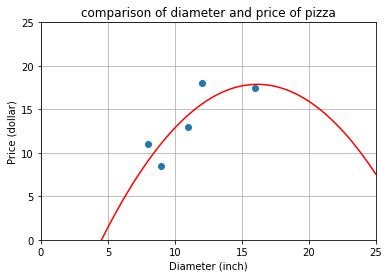

In [13]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0,25,100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('comparison of diameter and price of pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Price (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Polynomial Regression: Quadratic vs cubic

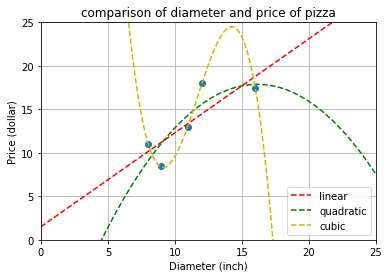

In [17]:
# training set 
plt.scatter(X_train, y_train)

#linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

#Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

#cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('comparison of diameter and price of pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Price (dollar)')
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()